# Task 2: Data Cleansing and Transformation

Instructions:
1. Acquire a real-world dataset requiring data cleaning and transformation.
2. Address data quality issues (missing values, inconsistent formats, outliers).
3. Develop a cleaning strategy (imputation, outlier detection, normalization).
4. Implement necessary transformation steps (feature engineering, aggregation).
5. Validate the cleaned and transformed dataset for integrity and usability.
6. Document the steps taken and provide clear explanations.
7. Present the cleaned and transformed dataset for further analysis.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("Datasets/california_housing/housing.csv")

### Dataset details
- Description: The dataset is California Housing Prices dataset. <br>
- Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]

In [3]:
# data.head()
data.info()
# data['longitude'].isnull().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Only one categorical data Ocean_Proximity

In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

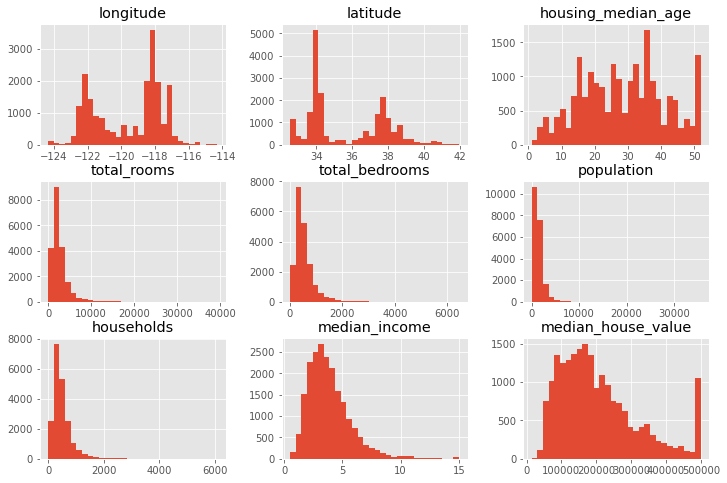

In [6]:
data.hist(bins=30,figsize=(12,8))

For this task, the data in not normally distributed.<br>
Using Stratified sampling technique to prepare the test dataset.<br>
Creating a new feature income_label which is income category and used if for sampling.<br>

In [8]:
data['income_label']=np.ceil(data['median_income']/1.5)
data['income_label'].where(data['income_label']<5,5.0,inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(data,data['income_label']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [12]:
strat_train_set.drop('income_label',axis=1,inplace=True)
strat_test_set.drop('income_label',axis=1,inplace=True)
strat_train_set.to_csv("Datasets/california_housing/strat_train_set.csv",index=False)
strat_test_set.to_csv("Datasets/california_housing/strat_test_set.csv",index=False)

In [14]:
data=pd.read_csv('Datasets/california_housing/strat_train_set.csv')
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


##### EDA
- Carrying out various visualization on train dataset for realising patterns, correlations and getting the sense of the data

Text(0.5, 1.0, 'Distribution of households')

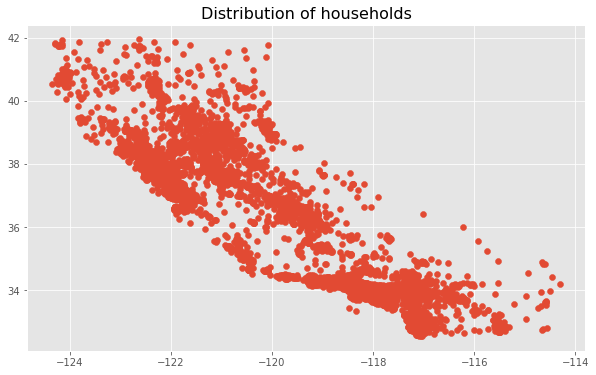

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)